In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import random
import statistics
from scipy import stats

**Setup**

First, we want to have some `background' data (presumably signal free) onto which we can inject a simulated signal. So the first step is to isolate some appropriate data from your data files. 

LHC
For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

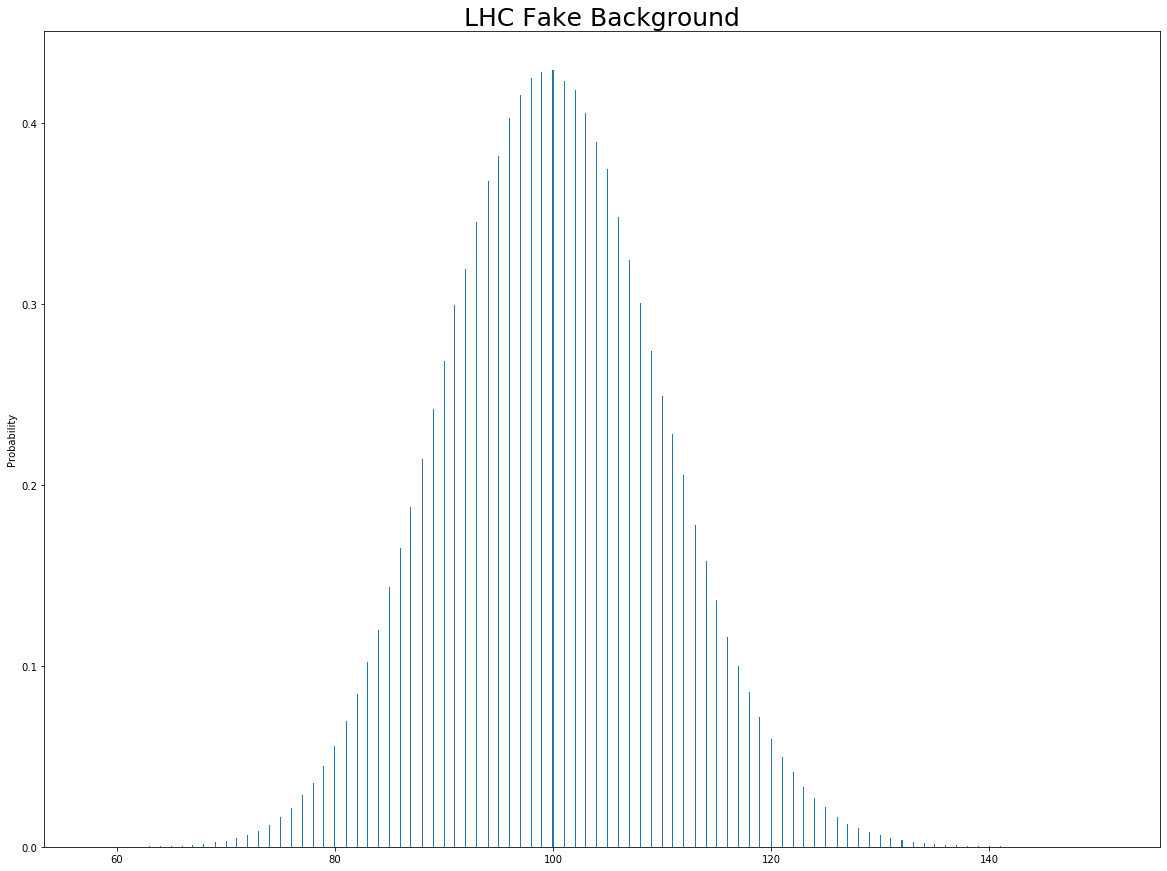

In [12]:
plt.rcParams["figure.figsize"] = (20,15)
mean = 100
LHCPO = stats.poisson.rvs(mean, size = 1000000)
plt.hist(LHCPO, 1000,density=True)
plt.title("LHC Fake Background",fontsize=25)
plt.ylabel('Probability')
plt.show()

**Problem 1**

The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. 

In [13]:
threshold = stats.poisson.ppf(1-1/(3.5*pow(10,6)),100)
print("Five sigma threshold is: " + str(threshold))

Five sigma threshold is: 154.0


**Problem 2**

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

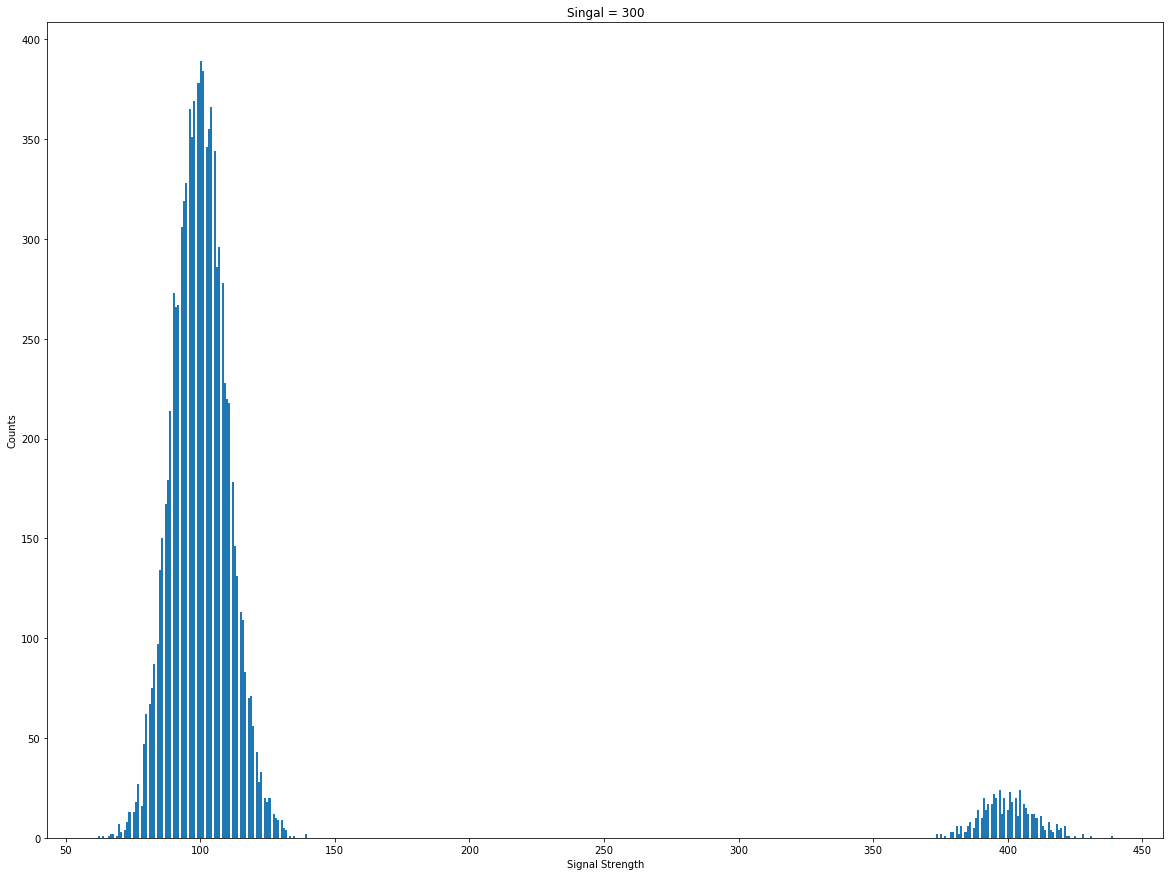

In [14]:
#I chose 300 to be my signal
inject = np.zeros(10000)
inject[random.sample(range(1,10000),500)] = 300
signal =  np.random.poisson(100,10000) + inject
fig, ax = plt.subplots()
ax.hist(signal,bins=500)
ax.set_title("Singal = 300")
ax.set_xlabel("Signal Strength")
ax.set_ylabel("Counts");

From the above graph, we can see that it is poisson distributed around the mean of 100 and the mean of 400, it is hard to find the trend since we have a large sample size and based on the central limit theorem, we can't find the trend.

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

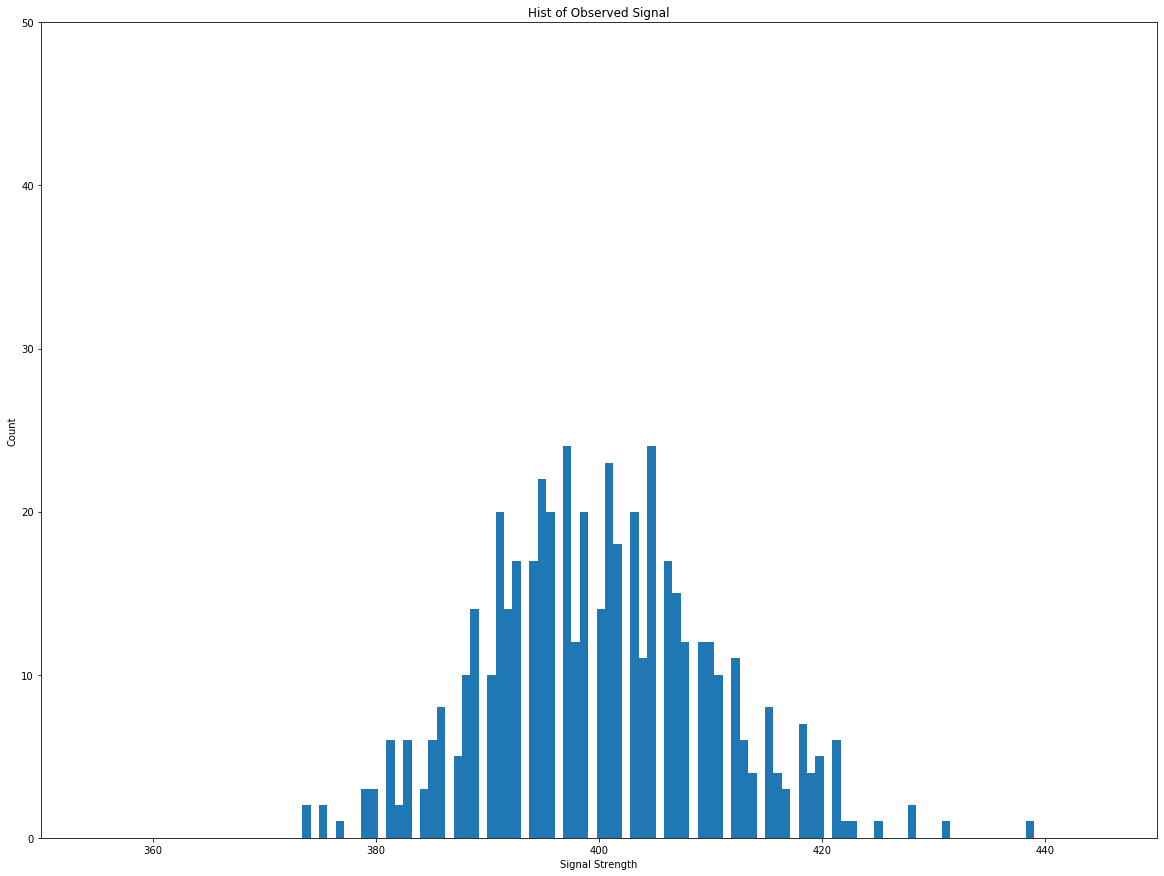

In [15]:
fig, ax = plt.subplots()
ax.hist(signal,bins=500)
ax.set_xlim((350,450))
ax.set_ylim((0,50))
ax.set_title("Hist of Observed Signal")
ax.set_xlabel("Signal Strength")
ax.set_ylabel("Count");

As we know that our injected signal was set to 300, however the observed signal is stronger. So it is biased. The shape looks symmetric to me although the left side seems has more weight than the right side, i think it can be ignored if the database if large enough.

**Problem 3**

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

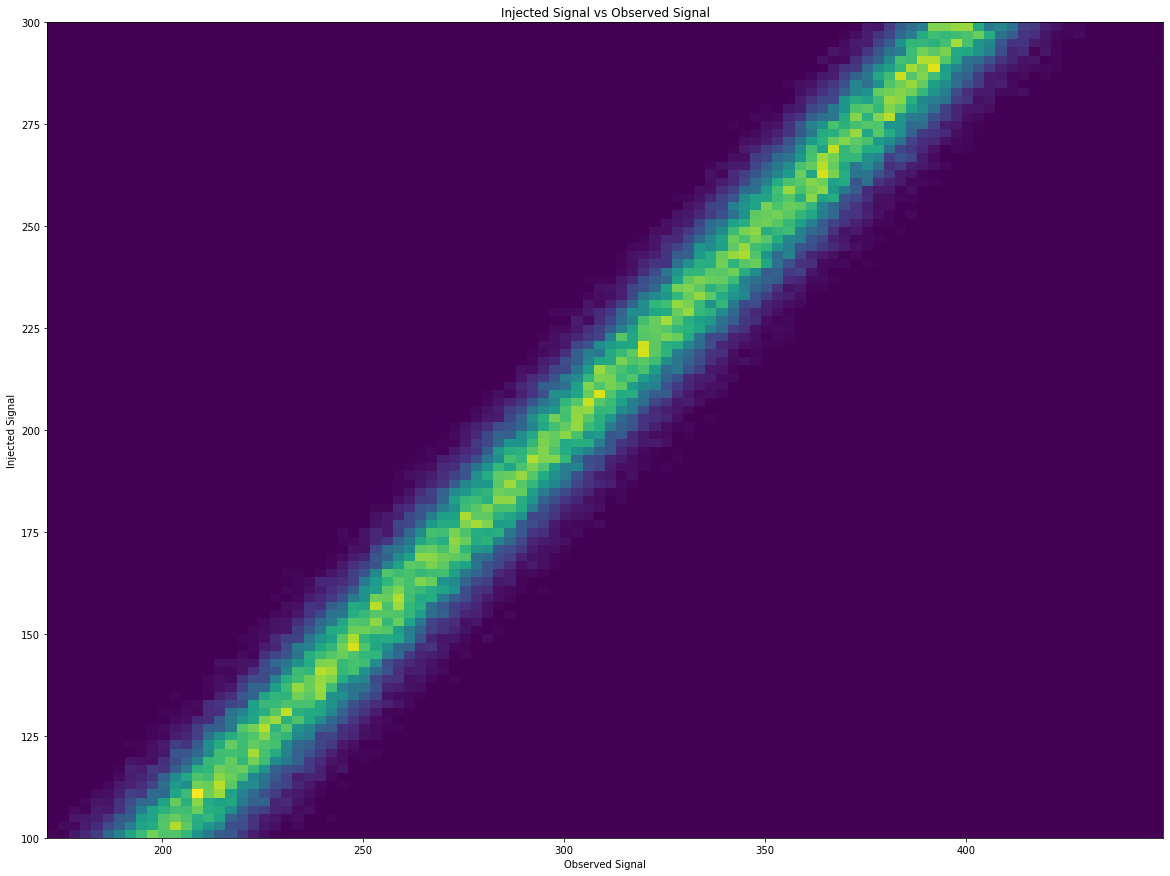

In [16]:
size = 100000
mu = 100
noise = stats.poisson.rvs(mu = mu, size=size)
injection = np.linspace(100,300,size)
observed = noise + injection
plt.hist2d(observed, injection, 100)
plt.ylabel("Injected Signal")
plt.xlabel("Observed Signal")
plt.title("Injected Signal vs Observed Signal")
plt.show()

As from the graph above, we can see that the offset between the injected signal and the observed signal is about 200.

b) For the same injected signal power as in problem 2, show that you get the same answer.

Text(0, 0.5, 'Probability')

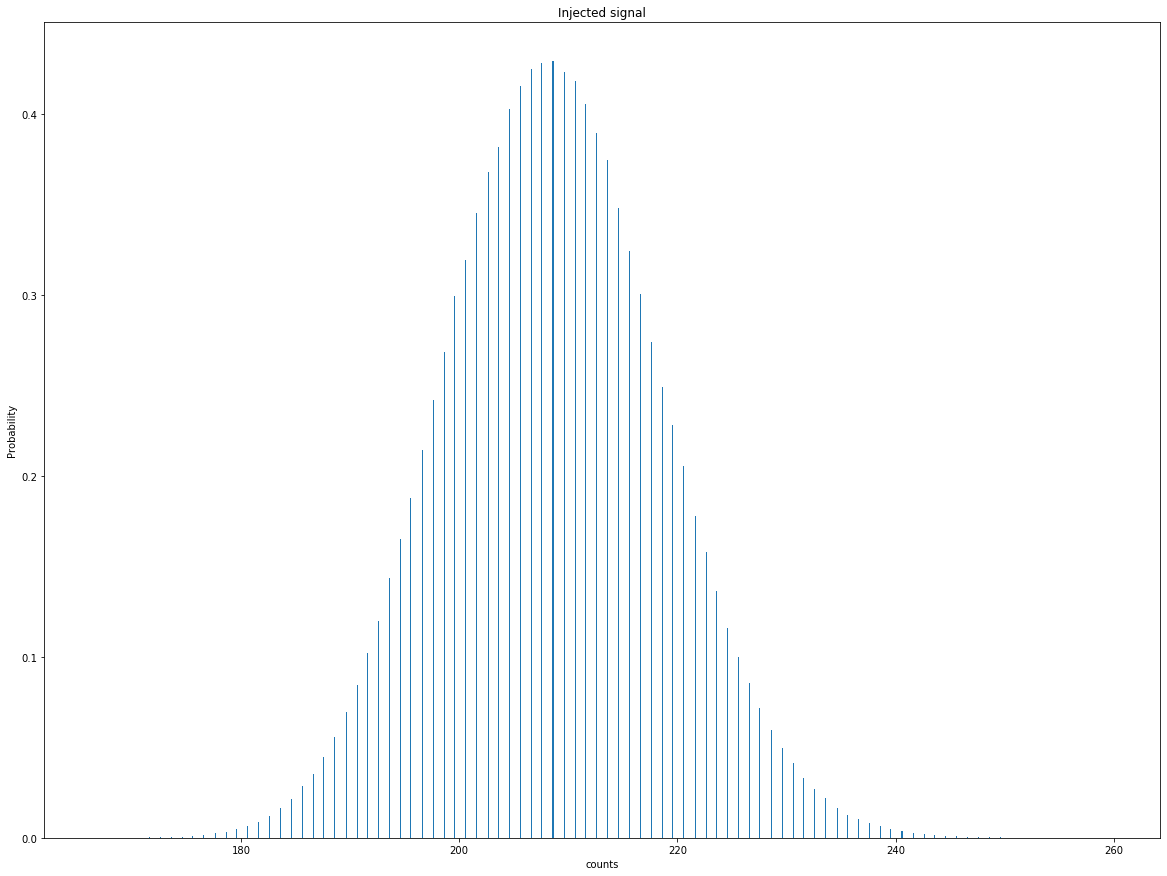

In [17]:
resiginal = LHCPO + injection [4300]
fx, ax = plt.subplots(1, 1)
ax.hist(resiginal, 1000,density=True)
ax.set_title('Injected signal')
ax.set_xlabel( 'counts')
ax.set_ylabel('Probability')

As we can see that this graph has the similar shape than that in problem A.

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5LaTeX: \sigmaσ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

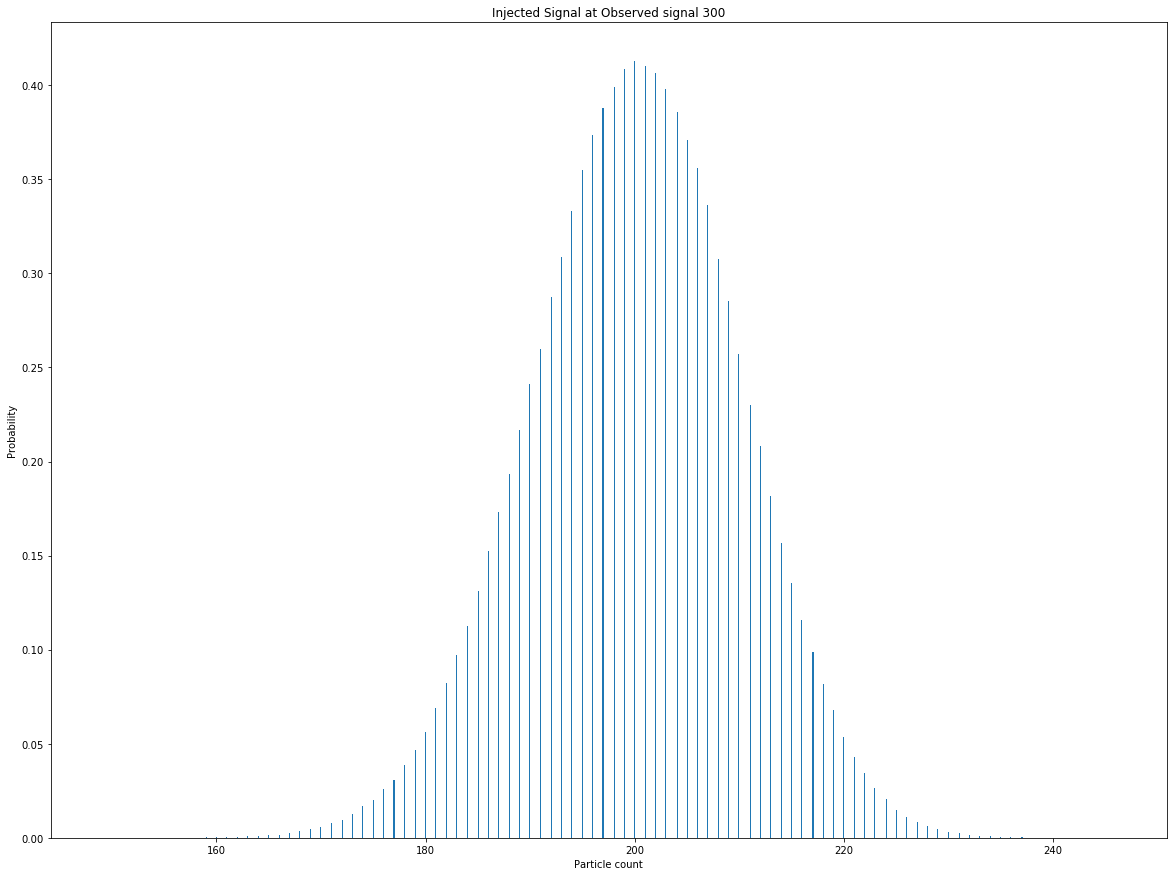

In [39]:
observedsignal = 300 
noise = stats.poisson.rvs(mu=100, size=1000000)
observed = np.ones(1000000)*observedsignal
injection = observed - noise
h = plt.hist(injection, bins=1000, density=True)
plt.title('Injected Signal at Observed signal 300')
plt.xlabel('Particle count')
plt.ylabel('Probability')
plt.show()


The graph above shows the probability distribution of injected signal with an observed signal of 300. As we can see that under the observed signal of 300, the mean of injected signal is about 200 which is consistant with the 2D histogram.

d) For your observed signal, what is the 1LaTeX: \sigmaσ uncertainty on the true signal strength?

In [45]:
mean = injection.mean()
std = injection.std()
upbound = stats.norm.isf(stats.norm.sf(1), loc=mean, scale=std)
lobound = stats.norm.isf(stats.norm.cdf(1), loc=mean, scale=std)
print('the lower bound is ' + str(lobound))
print('the upper bound is ' + str(upbound))

the lower bound is 190.00949093120363
the upper bound is 210.00688606879638


For the 1𝜎 uncertainty, the upper bound is 210 and the lower bound of injected signal is 190.

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

Our injection signal looks normal and symmetric. It is biased since the true injected signal is about 190 - 210 while the observed signal is way much higher than that as 
Since our injection signal is normal or symmetric, distribution creates a gaussian model for the injected signal. It is also biased - the bias is the noise that we are taking away from the observed signal.
The interval we calculated is,
Above interval does not look exactly symmetric. This makes sense because distribtuion itself is not symmetric about the peak point that it should have different interval towards the upper region and towards the lower region. Also, the result is biased because while the true injected signal was about 139~159 while the observed signal was much higher than that as 250.